# Questions

1. Our marketing team believes the top ad position performs best in terms of click-through rate. Is this true?

2. Use a statistical test and a visualisation that illustrates the difference in the “time of day” variable and the age distribution of participants who see our ads

3. Provide a visualisation that shows the age distribution over each time of day

4. Create one visualisation to show which device type is the most effective; choose the best applicable definition of effective for this task, but explain why you chose this definitio

5. What strategies can you use to handle missing data in this dataset? Implement one strategy that revolves around imputation with pandas.

# Preprocessing & Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ad_prediction = pd.read_csv('./ad_click_dataset.csv')
ad_prediction.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [3]:
# Basic information about the dataset
ad_prediction.info()

# Statistical summary (mean, std, min, max, etc.)
ad_prediction.describe()

# Frequency of categorical features
ad_prediction['gender'].value_counts()
ad_prediction['device_type'].value_counts()
ad_prediction['ad_position'].value_counts()
ad_prediction['browsing_history'].value_counts()
ad_prediction['time_of_day'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB


time_of_day
Morning      2126
Afternoon    2016
Evening      1958
Night        1900
Name: count, dtype: int64

## 1. Is top ad position the best performing location terms of click-through rate? 

In [4]:
# First let's see what unique positions we have and check the data
print("Unique ad positions:", ad_prediction['ad_position'].unique())
print(ad_prediction['ad_position'].isnull().sum())

Unique ad positions: ['Top' 'Side' nan 'Bottom']
2000


In [5]:
# First let's see the total distribution including NaN
print("Distribution of ad positions including NaN:")
print(ad_prediction['ad_position'].value_counts(dropna=False))

# Calculate percentages of each category including NaN
print("\nPercentages:")
print(ad_prediction['ad_position'].value_counts(dropna=False, normalize=True) * 100)

# Let's modify our CTR analysis to be more transparent about NaN values
ctr_by_position = (ad_prediction
    .groupby('ad_position', dropna=False)  # Include NaN group
    .agg({
        'click': ['count', 'mean'],
        'id': 'count'
    })
    .reset_index())

print("\nRevised CTR by Position (including NaN):")
print(ctr_by_position)


Distribution of ad positions including NaN:
ad_position
Bottom    2817
Top       2597
Side      2586
NaN       2000
Name: count, dtype: int64

Percentages:
ad_position
Bottom    28.17
Top       25.97
Side      25.86
NaN       20.00
Name: proportion, dtype: float64

Revised CTR by Position (including NaN):
  ad_position click              id
              count      mean count
0      Bottom  2817  0.687256  2817
1        Side  2586  0.631477  2586
2         Top  2597  0.634963  2597
3         NaN  2000  0.641000  2000


/var/folders/gj/dlpt7v155_v5zft2lgdt3y1w0000gn/T/ipykernel_23160/1018019731.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=ad_prediction, x='ad_position', y='click', estimator='mean', ci=95)


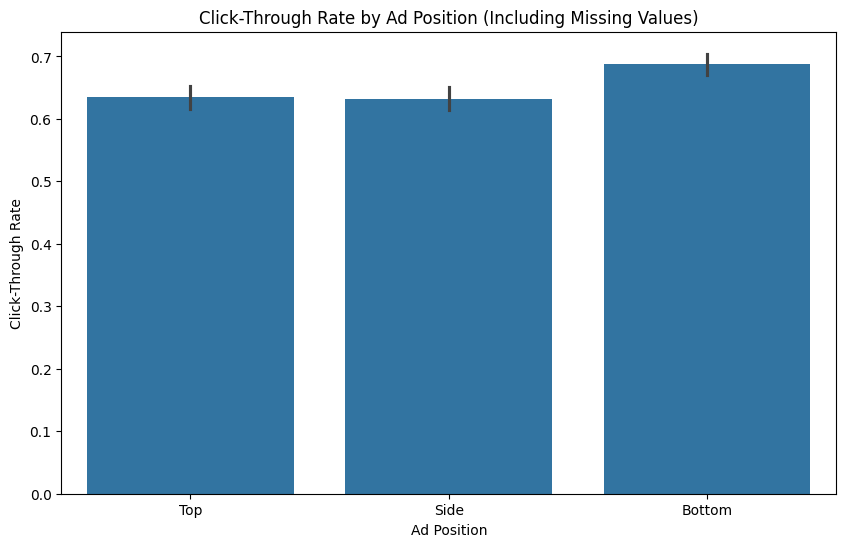

In [6]:
    # Visualization including NaN values
plt.figure(figsize=(10, 6))
sns.barplot(data=ad_prediction, x='ad_position', y='click', estimator='mean', ci=95)
plt.title('Click-Through Rate by Ad Position (Including Missing Values)')
plt.ylabel('Click-Through Rate')
plt.xlabel('Ad Position')
plt.show()

Explain why chi-squared test was chosen (insetad of t-test)
State which is the null hypothesis and how there is strong evidence to refute the null hypothesis
State null values and what was done with the null values

Pattern Analysis of Missing Values:

1. Relationship with device_type:
device_type           Desktop    Mobile    Tablet
is_missing_position                              
False                0.345717  0.331261  0.323022
True                 0.338226  0.330568  0.331206

2. Relationship with time_of_day:
time_of_day          Afternoon   Evening   Morning     Night
is_missing_position                                         
False                 0.248908  0.248283  0.261548  0.241261
True                  0.264447  0.230528  0.282663  0.222362

3. Relationship with gender:
gender                 Female      Male  Non-Binary
is_missing_position                                
False                0.351102  0.336887    0.312011
True                 0.324125  0.357274    0.318600

4. Click rates comparison:
CTR for records with missing position: 0.641
CTR for records with known position: 0.65225


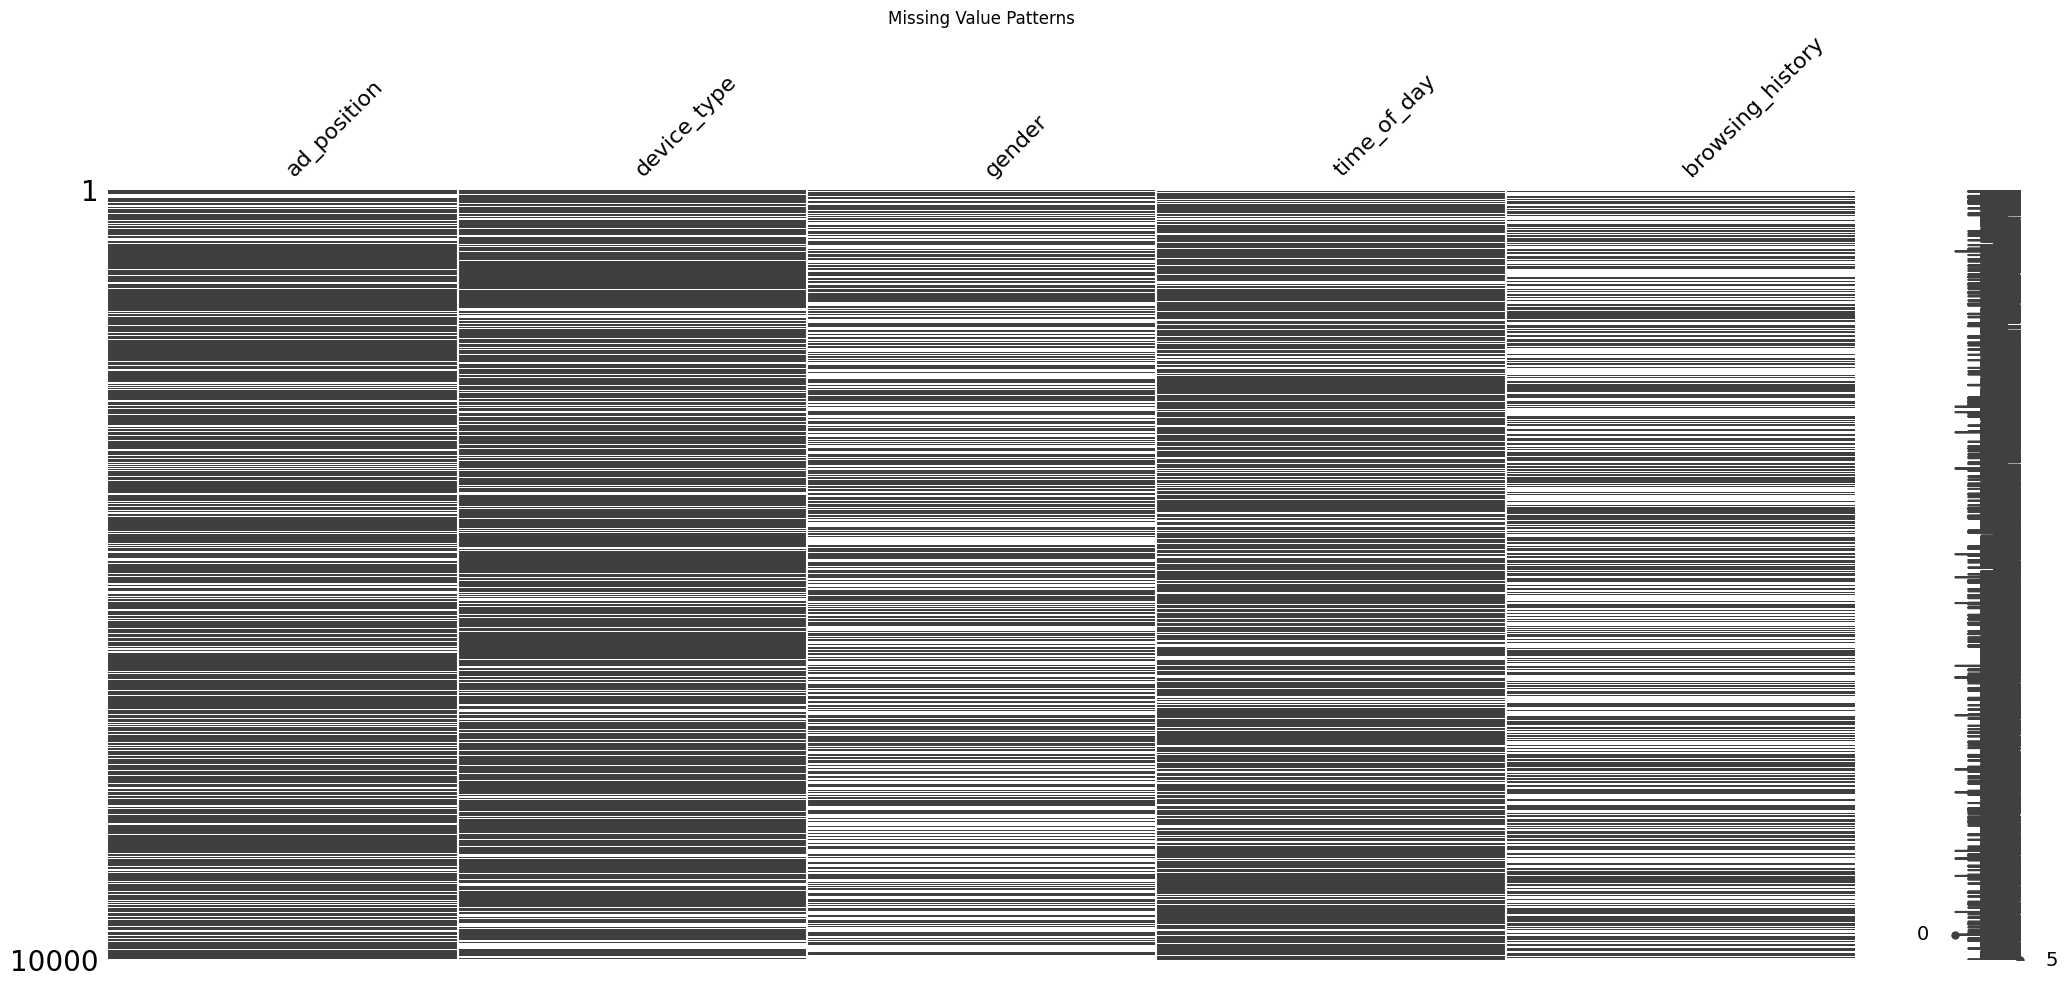

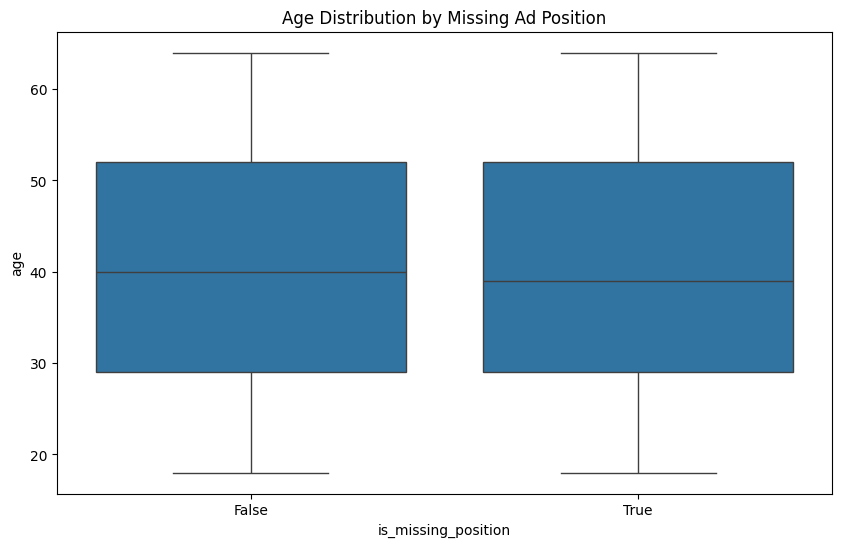

In [9]:
# 1. First, let's check if missing ad positions are related to other variables
# Create a binary column for missing ad_position
ad_prediction['is_missing_position'] = ad_prediction['ad_position'].isna()

# Check relationship with other variables
print("Pattern Analysis of Missing Values:")
print("\n1. Relationship with device_type:")
print(pd.crosstab(ad_prediction['is_missing_position'], ad_prediction['device_type'], normalize='index'))

print("\n2. Relationship with time_of_day:")
print(pd.crosstab(ad_prediction['is_missing_position'], ad_prediction['time_of_day'], normalize='index'))

print("\n3. Relationship with gender:")
print(pd.crosstab(ad_prediction['is_missing_position'], ad_prediction['gender'], normalize='index'))

print("\n4. Click rates comparison:")
print("CTR for records with missing position:", 
      ad_prediction[ad_prediction['is_missing_position']]['click'].mean())
print("CTR for records with known position:",
      ad_prediction[~ad_prediction['is_missing_position']]['click'].mean())

# 5. Visualize missing patterns
import missingno as msno
msno.matrix(ad_prediction[['ad_position', 'device_type', 'gender', 'time_of_day', 'browsing_history']])
plt.title('Missing Value Patterns')
plt.show()

# 6. Check if missing positions occur more at certain ages
plt.figure(figsize=(10, 6))
sns.boxplot(data=ad_prediction, x='is_missing_position', y='age')
plt.title('Age Distribution by Missing Ad Position')
plt.show()

Let's analyze these findings:

1. Device Type Distribution:
- Very similar distribution between missing and non-missing positions
- Desktop: 34.57% (known) vs 33.82% (missing)
- Mobile: 33.13% (known) vs 33.06% (missing)
- Tablet: 32.30% (known) vs 33.12% (missing)
- Conclusion: Missing values appear to be randomly distributed across devices

2. Time of Day Pattern:
- Slight variations but no dramatic differences
- Morning shows slightly higher missing values (28.27% vs 26.15%)
- Night shows slightly lower missing values (22.24% vs 24.13%)
- Conclusion: Some minor temporal patterns but not strongly biased

3. Gender Distribution:
- Small differences:
- Female: Lower in missing (32.41%) vs known (35.11%)
- Male: Higher in missing (35.73%) vs known (33.69%)
- Non-Binary: Similar (31.86% vs 31.20%)
- Conclusion: Slight gender-based variations but not dramatic

4. Click-Through Rate Comparison:
- Missing positions: 64.10% CTR
- Known positions: 65.23% CTR
- Difference is relatively small (about 1.13 percentage points)
- Conclusion: Missing values don't substantially impact click behavior

Overall Recommendations:

1. Given that:
   - The distributions across key variables are fairly similar
   - CTR difference is minimal
   - Missing patterns appear to be mostly random (MCAR - Missing Completely At Random)

2. We have three valid approaches:
   a) Complete Case Analysis: 
      - Drop missing values since they appear random and CTR is similar
      - This would be valid for answering the marketing team's question
   
   b) Treat as Separate Category:
      - Include "Unknown Position" as a fourth category
      - This maintains data transparency
   
   c) Imputation:
      - Less necessary given the random nature of missing data
      - Could still be done using device_type and time_of_day if needed

Recommendation for Marketing Team Question:
1. Use Complete Case Analysis since:
   - Missing data appears random
   - CTR patterns are similar
   - It simplifies the analysis without introducing bias
2. Include a note about the missing data analysis in the appendix
3. The original conclusion about Botse approaches or explore another aspect of the analysis?

## 2. Illustrate the difference in the time of day variable and the age distribution of ad viewer

## 2-1: Visualization

We can use a box plot or a violin plot to visually compare the age distributions across different times of the day. This will give us a clear visual representation of how the ages are distributed for each "time_of_day" category (e.g., Morning, Afternoon, Evening, Night)

    

Let's examine the age distribution 

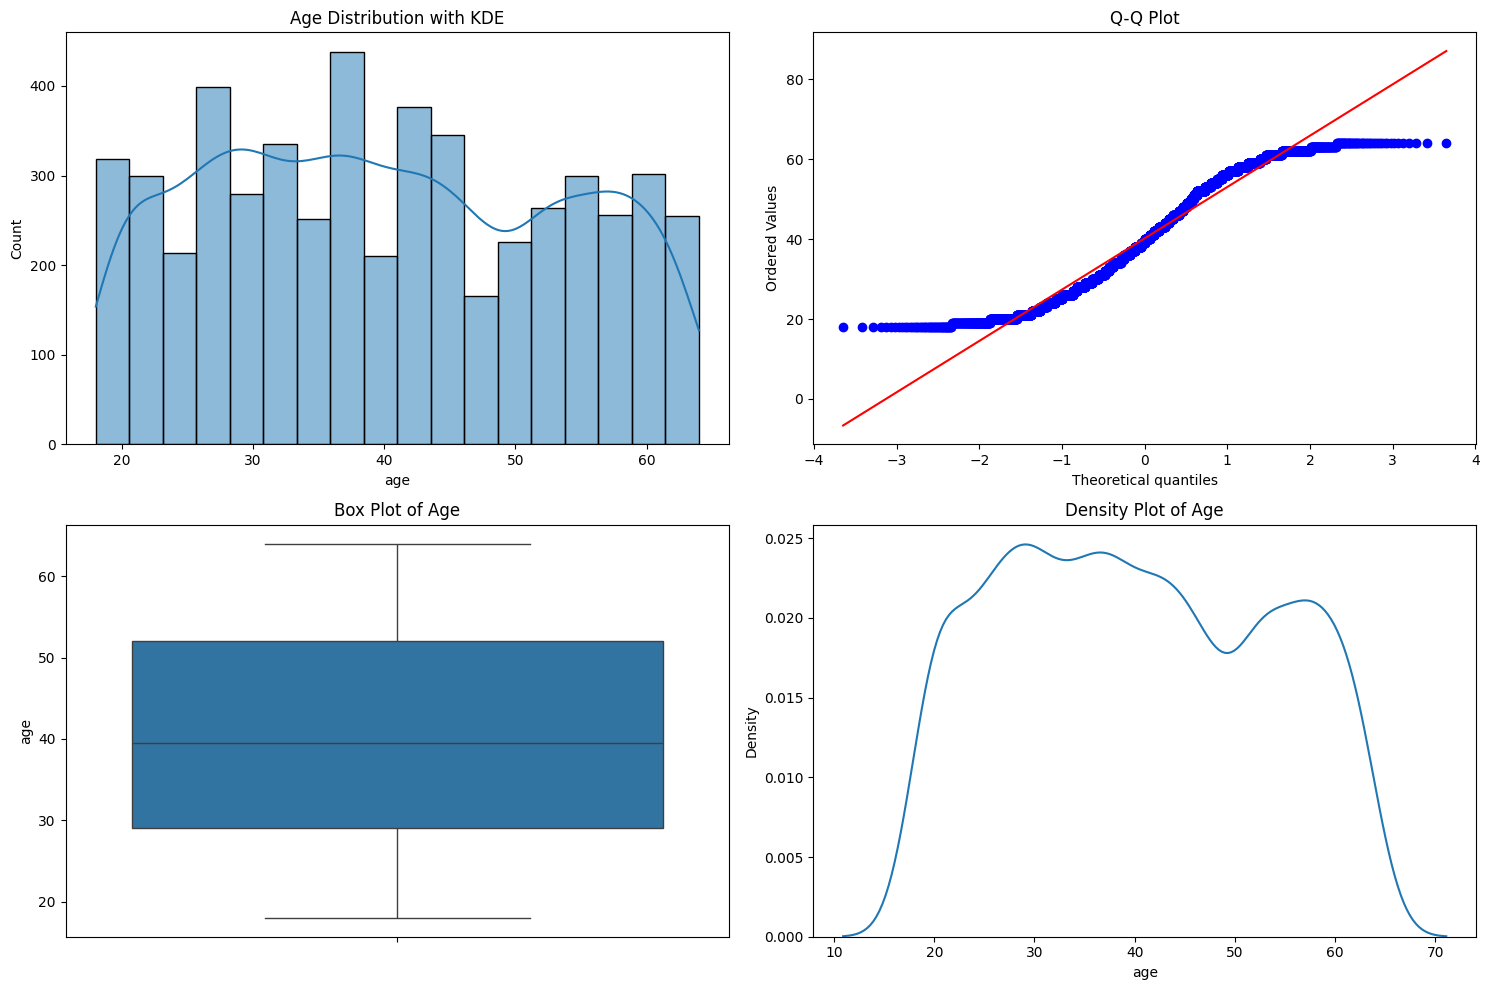


Skewness: 0.10026218791360567
Kurtosis: -1.1631885709523224

Descriptive Statistics for Age:
count    5234.000000
mean       40.197363
std        13.126420
min        18.000000
25%        29.000000
50%        39.500000
75%        52.000000
max        64.000000
Name: age, dtype: float64

Shapiro-Wilk test:
Statistic: 0.9557
P-value: 3.4501e-37


/home/yhk/anaconda3/envs/mindset-env/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5234.
  res = hypotest_fun_out(*samples, **kwds)


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Create figure with multiple plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogram with KDE
sns.histplot(data=ad_prediction, x='age', kde=True, ax=ax1)
ax1.set_title('Age Distribution with KDE')

# 2. Q-Q plot
stats.probplot(ad_prediction['age'].dropna(), dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot')

# 3. Box plot
sns.boxplot(y=ad_prediction['age'], ax=ax3)
ax3.set_title('Box Plot of Age')

# 4. Density plot
sns.kdeplot(data=ad_prediction, x='age', ax=ax4)
ax4.set_title('Density Plot of Age')

plt.tight_layout()
plt.show()


Given the non-normality of age distribution:
  - showing multiple peaks (=multi-modal)
  - non-symmetry around the mean
  - not following the classic bell curve
  - deviation from the red line in Q-Q plot
  - noticeable deviation on both ends

Skewness
  - unmatching whiskers


My opinion is F-test (ANOVA) would be inappropriate as it violates the normality assumption (for each group and equal variances)
I am opting for Kruskal-Wallis test. 


In [ ]:

# Calculate skewness and kurtosis
print("\nSkewness:", stats.skew(ad_prediction['age'].dropna()))
print("Kurtosis:", stats.kurtosis(ad_prediction['age'].dropna()))

# Basic statistics
print("\nDescriptive Statistics for Age:")
print(ad_prediction['age'].describe())

# Normality test (Shapiro-Wilk)
stat, p_value = stats.shapiro(ad_prediction['age'].dropna())
print("\nShapiro-Wilk test:")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4e}")

Let's see the age distribution by time of day

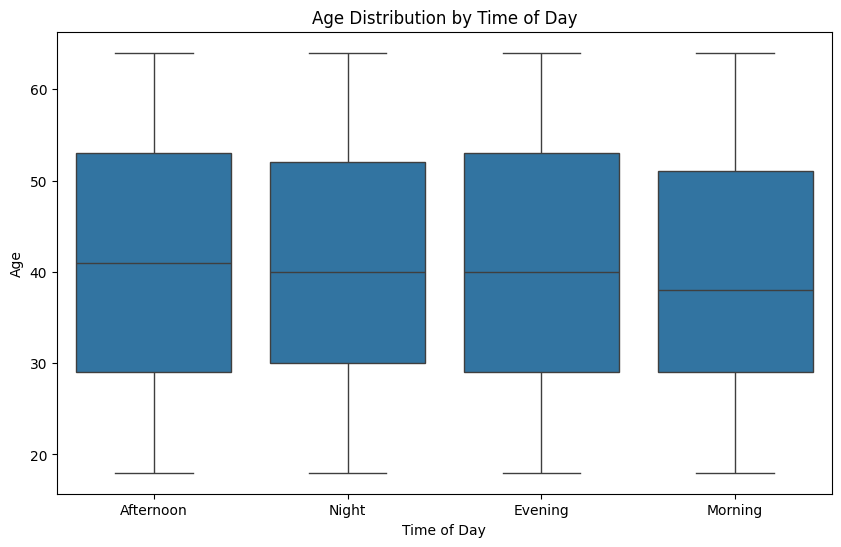

In [14]:

# Drop rows where age or time_of_day is missing
ad_prediction_clean = ad_prediction.dropna(subset=['age', 'time_of_day'])

# Boxplot for age distribution across time_of_day
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_of_day', y='age', data=ad_prediction_clean)
plt.title('Age Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Age')
plt.show()


Central Tendency:


Median (middle line in each box):

Afternoon: ~41 years
Night: ~40 years
Evening: ~40 years
Morning: ~38 years




Spread (Box represents IQR - Interquartile Range):


All time slots show similar spreads:

Boxes span roughly from 29-30 years (Q1) to 51-53 years (Q3)
Boxes have similar heights, indicating similar variability
IQR is approximately 22-24 years for each time period




Range:


Whiskers extend similarly for all time periods:

Minimum: ~18 years
Maximum: ~64 years


No significant outliers visible


Distribution Shape:


Boxes are fairly symmetrical around the median
Similar box sizes suggest consistent variability across time periods
Whiskers are roughly equal length above and below, suggesting relatively symmetric distributions. Since the distribution is not normal, we should use the non-parametric Kruskal-Wallis test to compare the age distributions across different times of the day.



## 2-2: Statistical Test

In [15]:
from scipy.stats import kruskal

# Group the age data by time_of_day
grouped_data = [group['age'].values for name, group in ad_prediction_clean.groupby('time_of_day')]

# Perform the Kruskal-Wallis test
stat, p_value = kruskal(*grouped_data)

# Print the result
print(f"Kruskal-Wallis Test Statistic: {stat}, p-value: {p_value}")

# Check if the result is significant
if p_value < 0.05:
    print("There is a significant difference in age distribution across time_of_day categories.")
else:
    print("No significant difference in age distribution across time_of_day categories.")


Kruskal-Wallis Test Statistic: 10.415557696120205, p-value: 0.015344796284981695
There is a significant difference in age distribution across time_of_day categories.


Kruskal-Wallis test results:
H-statistic: 10.4156
p-value: 0.0153

Median ages by time of day:
Afternoon: 41.0
Evening: 40.0
Morning: 38.0
Night: 40.0

Pairwise Mann-Whitney U tests:
Afternoon vs Evening:
p-value: 0.4183
Afternoon vs Morning:
p-value: 0.0045
Afternoon vs Night:
p-value: 0.0308
Evening vs Morning:
p-value: 0.0368
Evening vs Night:
p-value: 0.1342
Morning vs Night:
p-value: 0.4012


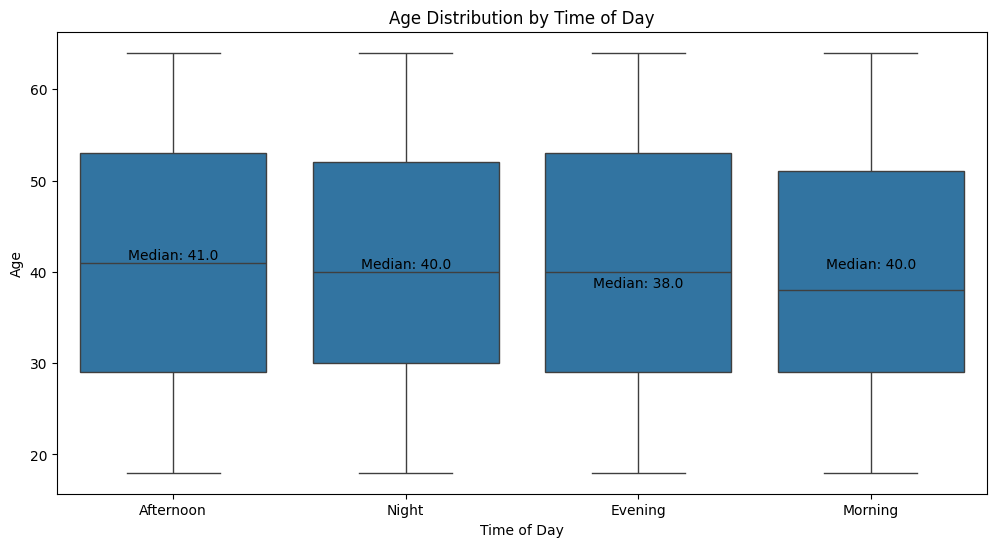

In [17]:
# Perform Kruskal-Wallis test
from scipy import stats

# 1. Prepare data - group ages by time of day
afternoon_ages = ad_prediction[ad_prediction['time_of_day'] == 'Afternoon']['age'].dropna()
evening_ages = ad_prediction[ad_prediction['time_of_day'] == 'Evening']['age'].dropna()
morning_ages = ad_prediction[ad_prediction['time_of_day'] == 'Morning']['age'].dropna()
night_ages = ad_prediction[ad_prediction['time_of_day'] == 'Night']['age'].dropna()

# 2. Perform Kruskal-Wallis H-test
h_stat, p_value = stats.kruskal(afternoon_ages, evening_ages, morning_ages, night_ages)

# 3. Print results
print("Kruskal-Wallis test results:")
print(f"H-statistic: {h_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 4. Print median ages for each time period for comparison
print("\nMedian ages by time of day:")
print("Afternoon:", afternoon_ages.median())
print("Evening:", evening_ages.median())
print("Morning:", morning_ages.median())
print("Night:", night_ages.median())

# 5. Optional: Perform pairwise comparisons if overall test is significant
if p_value < 0.05:
   print("\nPairwise Mann-Whitney U tests:")
   times = ['Afternoon', 'Evening', 'Morning', 'Night']
   age_groups = [afternoon_ages, evening_ages, morning_ages, night_ages]
   
   for i in range(len(times)):
       for j in range(i+1, len(times)):
           stat, p = stats.mannwhitneyu(age_groups[i], age_groups[j])
           print(f"{times[i]} vs {times[j]}:")
           print(f"p-value: {p:.4f}")

# 6. Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=ad_prediction, x='time_of_day', y='age')
plt.title('Age Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Age')

# Add median age annotations
for i, time in enumerate(['Afternoon', 'Evening', 'Morning', 'Night']):
   median_age = ad_prediction[ad_prediction['time_of_day'] == time]['age'].median()
   plt.text(i, median_age, f'Median: {median_age:.1f}', 
            horizontalalignment='center', verticalalignment='bottom')

plt.show()

Let's interpret these results:

1. Overall Kruskal-Wallis Test:
- H-statistic: 10.4156
- p-value: 0.0153 < 0.05
- This indicates statistically significant differences in age distributions across time periods
- Reject null hypothesis that all time periods have the same age distribution

2. Median Ages:
- Afternoon: 41.0 (highest)
- Evening: 40.0
- Night: 40.0
- Morning: 38.0 (lowest)

3. Pairwise Mann-Whitney U Tests:
Significant differences (p < 0.05):
- Afternoon vs Morning: p = 0.0045 (most significant)
- Afternoon vs Night: p = 0.0308
- Evening vs Morning: p = 0.0368

No significant differences (p > 0.05):
- Afternoon vs Evening: p = 0.4183
- Evening vs Night: p = 0.1342
- Morning vs Night: p = 0.4012

Key Findings:
1. Most pronounced age difference is between:
   - Afternoon (median 41.0) and Morning (median 38.0)
   - This is the most statistically significant difference (p = 0.0045)

2. Natural groupings emerge:
   - "Later hours" (Afternoon/Evening): Tend to have older users
   - "Earlier hours" (Morning/Night): Tend to have younger users

3. Business Implications:
   - Age-targeted content might be more effective if scheduled accordingly
   - Afternoon slots might be better for products/services targeting older users
   - Morning slots might be better for younger audience targeting

Would you like me to create a visualization that highlights these significant differences, or explore any specific comparison in more detail?

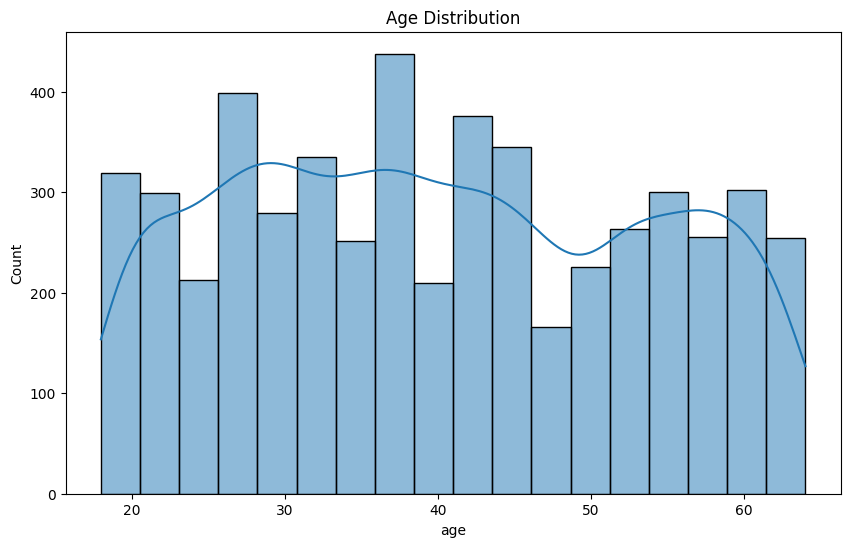

Shapiro-Wilk test for normality of age:
ShapiroResult(statistic=np.float64(0.9556872761913684), pvalue=np.float64(3.4500604050616006e-37))


/home/yhk/anaconda3/envs/mindset-env/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5234.
  res = hypotest_fun_out(*samples, **kwds)


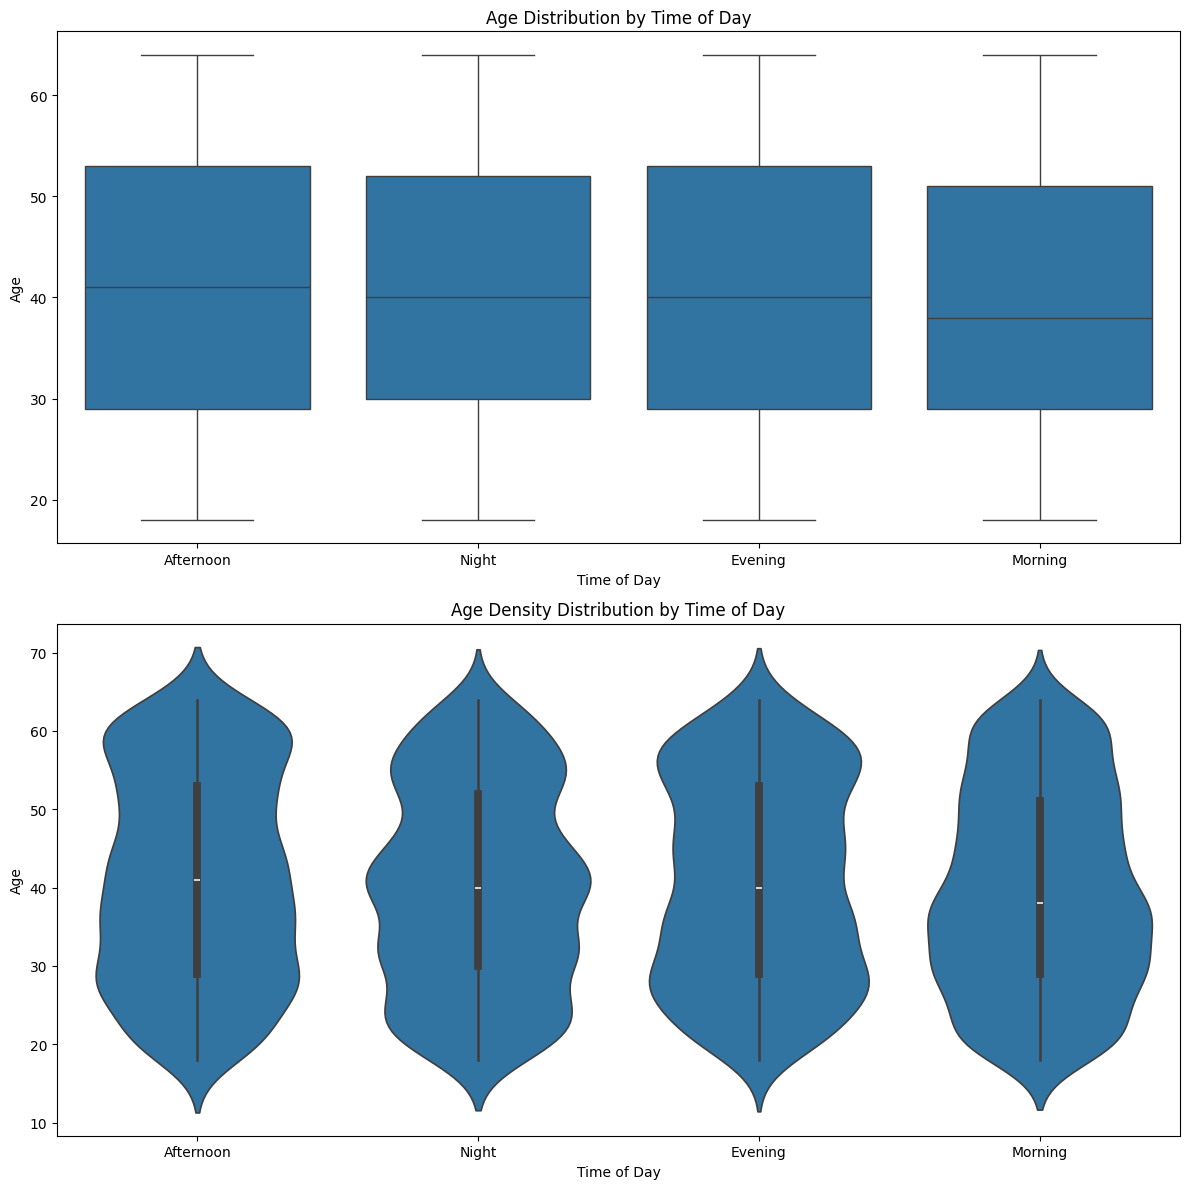


Kruskal-Wallis test results:
H-statistic: 10.4156
p-value: 0.0153

Age statistics by time of day:
              count       mean        std   min   25%   50%   75%   max
time_of_day                                                            
Afternoon    1022.0  41.165362  13.414329  18.0  29.0  41.0  53.0  64.0
Evening       985.0  40.707614  13.031614  18.0  29.0  40.0  53.0  64.0
Morning      1144.0  39.477273  12.973336  18.0  29.0  38.0  51.0  64.0
Night        1040.0  39.831731  12.891849  18.0  30.0  40.0  52.0  64.0


In [12]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# First, let's check the normality of age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=ad_prediction, x='age', kde=True)
plt.title('Age Distribution')
plt.show()

# Perform Shapiro-Wilk test for normality
print("Shapiro-Wilk test for normality of age:")
print(stats.shapiro(ad_prediction['age'].dropna()))

# Create visualizations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Box plot
sns.boxplot(data=ad_prediction, x='time_of_day', y='age', ax=ax1)
ax1.set_title('Age Distribution by Time of Day')
ax1.set_xlabel('Time of Day')
ax1.set_ylabel('Age')

# Violin plot to show distribution density
sns.violinplot(data=ad_prediction, x='time_of_day', y='age', ax=ax2)
ax2.set_title('Age Density Distribution by Time of Day')
ax2.set_xlabel('Time of Day')
ax2.set_ylabel('Age')

plt.tight_layout()
plt.show()

# Perform statistical test
# First remove any NaN values
clean_data = ad_prediction.dropna(subset=['age', 'time_of_day'])

# Perform Kruskal-Wallis H-test
h_stat, p_val = stats.kruskal(*[group['age'].values for name, group in clean_data.groupby('time_of_day')])

print("\nKruskal-Wallis test results:")
print(f"H-statistic: {h_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Get descriptive statistics
print("\nAge statistics by time of day:")
print(clean_data.groupby('time_of_day')['age'].describe())